In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import cv2

(1200, 1920, 3)
(60, 96, 3)
(5760, 3)


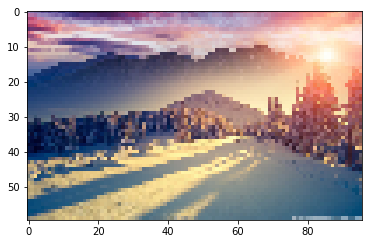

In [3]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print im.shape

r, c = im.shape[:2]
out_r = 60 
im = cv2.resize(im, (int(out_r * float(c)/r), out_r))
print im.shape
#Pixel Vector
pixels = im.reshape((-1, 3))
print pixels.shape
plt.imshow(im)

In [4]:
km = KMeans(n_clusters=10)
km.fit(pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
print colors, colors.shape

[[208 171 136]
 [ 98 111 131]
 [244 223 205]
 [ 49  76 115]
 [197 166 183]
 [244 209 157]
 [203 116 103]
 [154 135 137]
 [123  79  90]
 [ 24  39  81]] (10, 3)


In [6]:
per = np.asarray(np.unique(km.labels_,return_counts=True)[1], dtype='float32')
per = per/pixels.shape[0]
per

array([ 0.10642361,  0.13993056,  0.06458333,  0.12916666,  0.0734375 ,
        0.1234375 ,  0.04583333,  0.15416667,  0.08090278,  0.08211806], dtype=float32)

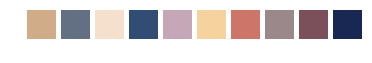

In [7]:
plt.figure(0)

for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis('off')
    plt.imshow(patch)

In [8]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key = lambda z:z[0], reverse =True)


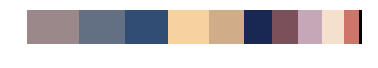

In [9]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0

for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start+width
    patch[:,start:end,:] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()

In [10]:
#Repainting the image with the centroids of the clusters
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im[i, j, :] = km.cluster_centers_[int(km.predict([im[i, j, :]]))]

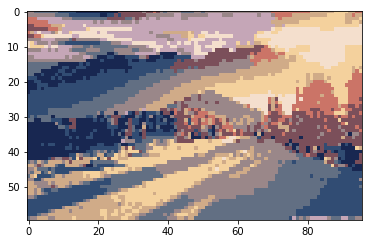

In [11]:
plt.imshow(im)

In [ ]:
# consider tsaking x,y coordinates also
